This part of code is built based on "data_pipeline_with_34" and cleaning modules from modules folder

Added by: Zichen Wang

In [1]:
import pandas as pd
import tabulate as tb
import sys
import os
from modules.clean import clean_data

## Part I. Data Pre-processing and Cleaning

### Overview of Raw Data

In [2]:
df_raw = pd.read_csv('./data/00-raw/pd_calls_for_service_2025_datasd.csv')
print("=="*12 + "Overview" + "=="*12)
print("Data Shape:")
print(df_raw.shape)
print("=="*12)
print("Raw Missing Overview:")
print(df_raw.isna().sum())
print("=="*12)
print("Data Samples:")
df_raw.head(3)

========================Overview========================
Data Shape:
(466978, 14)
Raw Missing Overview:
INCIDENT_NUM                      0
DATE_TIME                         0
DAY_OF_WEEK                       0
ADDRESS_NUMBER_PRIMARY            0
ADDRESS_DIR_PRIMARY          446434
ADDRESS_ROAD_PRIMARY           6265
ADDRESS_SFX_PRIMARY           48447
ADDRESS_DIR_INTERSECTING     466978
ADDRESS_ROAD_INTERSECTING    387035
ADDRESS_SFX_INTERSECTING     466978
CALL_TYPE                       985
DISPOSITION                    2351
BEAT                              0
PRIORITY                          0
dtype: int64
Data Samples:


,INCIDENT_NUM,DATE_TIME,DAY_OF_WEEK,ADDRESS_NUMBER_PRIMARY,ADDRESS_DIR_PRIMARY,ADDRESS_ROAD_PRIMARY,ADDRESS_SFX_PRIMARY,ADDRESS_DIR_INTERSECTING,ADDRESS_ROAD_INTERSECTING,ADDRESS_SFX_INTERSECTING,CALL_TYPE,DISPOSITION,BEAT,PRIORITY
0,E25120020309,2025-12-15 9:48:49,2,4200,NaN,03RD,AVE,NaN,NaN,NaN,487R,K,627,9
1,E25120025105,2025-12-18 16:32:13,5,5500,NaN,MILDRED,ST,NaN,NaN,NaN,10852R,K,622,9
2,E25120028508,2025-12-20 22:43:23,7,500,NaN,05TH,AVE,NaN,NaN,NaN,415,A,523,2


### Applying the data clearning method

Following columns were removed:
* 'ADDRESS_DIR_INTERSECTING'
* 'ADDRESS_ROAD_INTERSECTING'
* 'ADDRESS_SFX_INTERSECTING'
* 'ADDRESS_DIR_PRIMARY'

In [3]:
df = clean_data(
    './data/00-raw/pd_calls_for_service_2025_datasd.csv',
    columns_to_remove=['ADDRESS_DIR_INTERSECTING', 'ADDRESS_ROAD_INTERSECTING', 'ADDRESS_SFX_INTERSECTING', 'ADDRESS_DIR_PRIMARY'],
    columns_to_clean=['ADDRESS_ROAD_PRIMARY', 'CALL_TYPE', 'DISPOSITION']
)
print("=="*12 + "Cleaning Overview" + "=="*12)
print(f"raw: {df_raw.shape}  →  cleaned: {df.shape}")
print("=="*12)
print("Raw Missing Overview:")
print(df.isna().sum())
print("=="*12)
print("Current Structure:")
df.head(3)
# df.dtypes, df.describe(include='all')

========================Cleaning Overview========================
raw: (466978, 14)  →  cleaned: (449524, 10)
Raw Missing Overview:
INCIDENT_NUM                  0
DATE_TIME                     0
DAY_OF_WEEK                   0
ADDRESS_NUMBER_PRIMARY        0
ADDRESS_ROAD_PRIMARY          0
ADDRESS_SFX_PRIMARY       37572
CALL_TYPE                     0
DISPOSITION                   0
BEAT                          0
PRIORITY                      0
dtype: int64
Current Structure:


,INCIDENT_NUM,DATE_TIME,DAY_OF_WEEK,ADDRESS_NUMBER_PRIMARY,ADDRESS_ROAD_PRIMARY,ADDRESS_SFX_PRIMARY,CALL_TYPE,DISPOSITION,BEAT,PRIORITY
0,E25120020309,2025-12-15 09:48:49,2,4200,03RD,AVE,487R,K,627,9
1,E25120025105,2025-12-18 16:32:13,5,5500,MILDRED,ST,10852R,K,622,9
2,E25120028508,2025-12-20 22:43:23,7,500,05TH,AVE,415,A,523,2


## Part II. Basic and Additional EDAs

This part of EDA is based on the main.py in modules. Thanks for the original author. I have added additional EDAs. I have also modified the methods to save generated pictures to output directory.

Feel free to add choropleth maps.

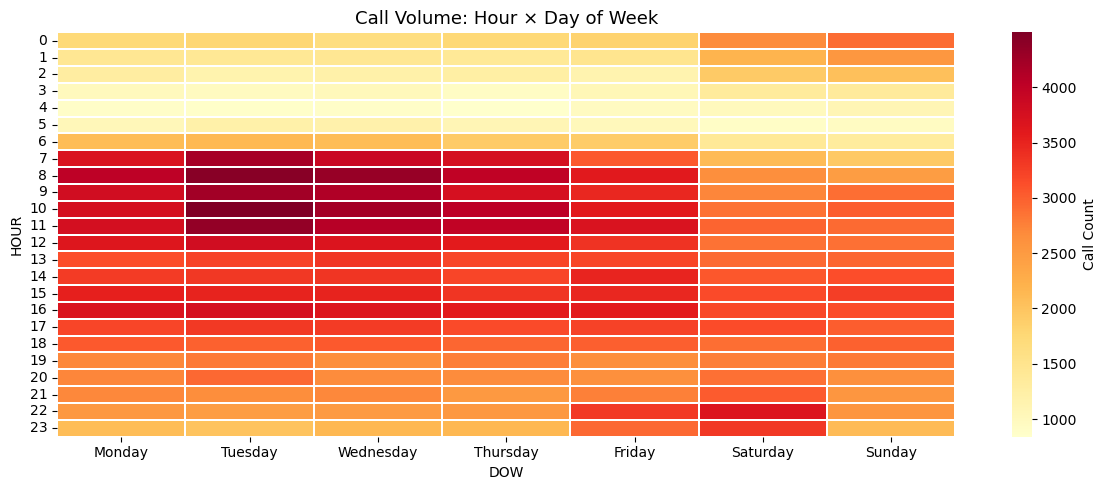

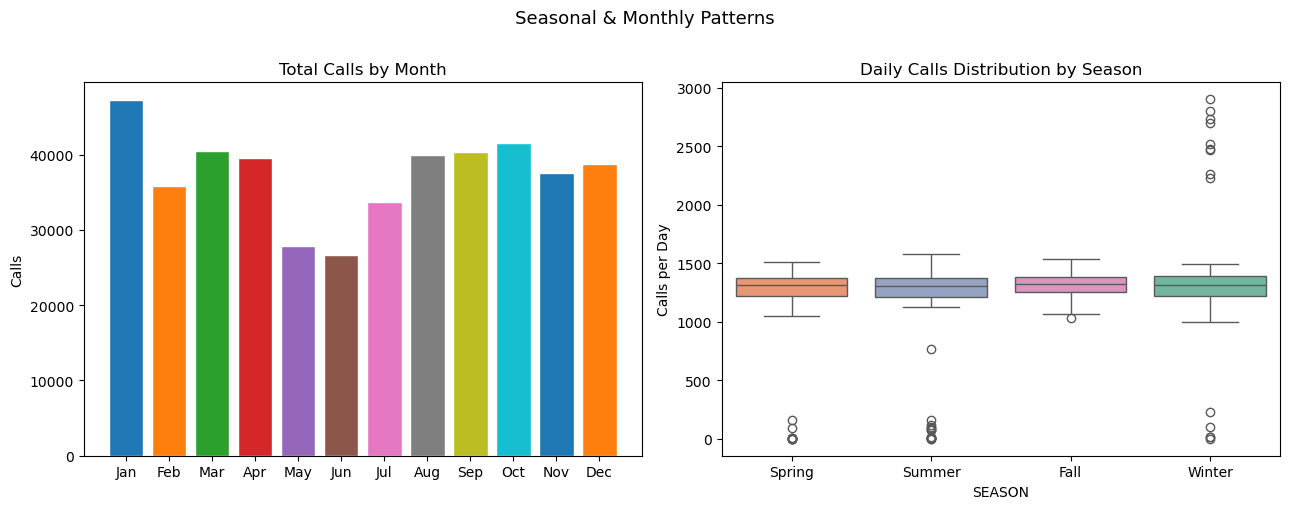

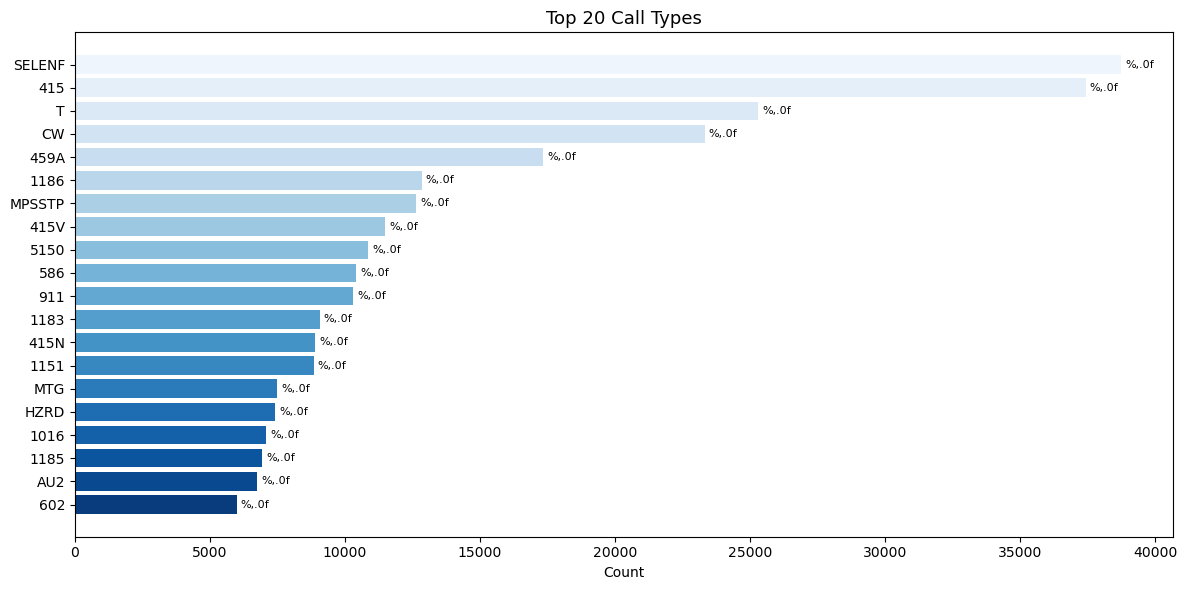

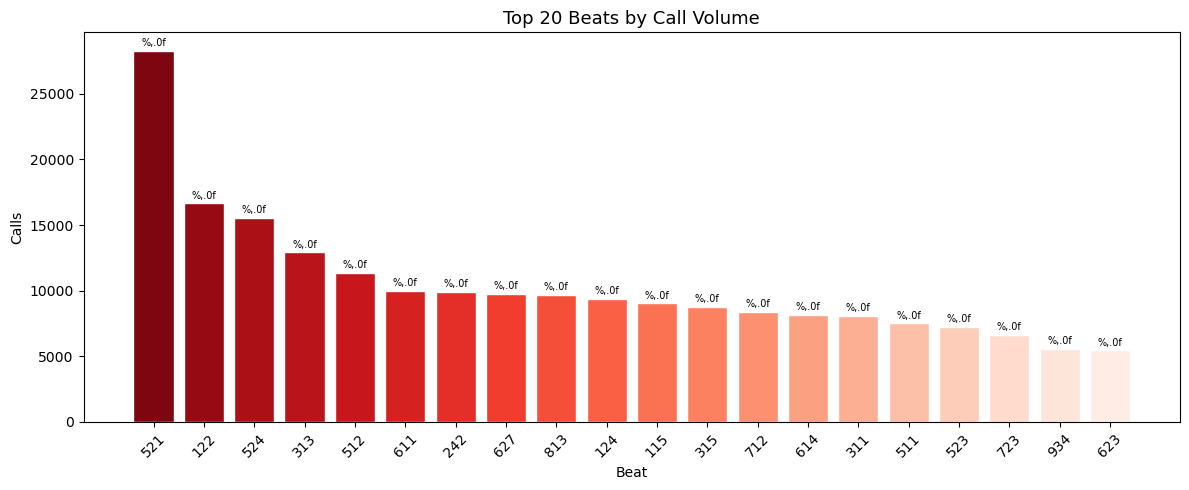

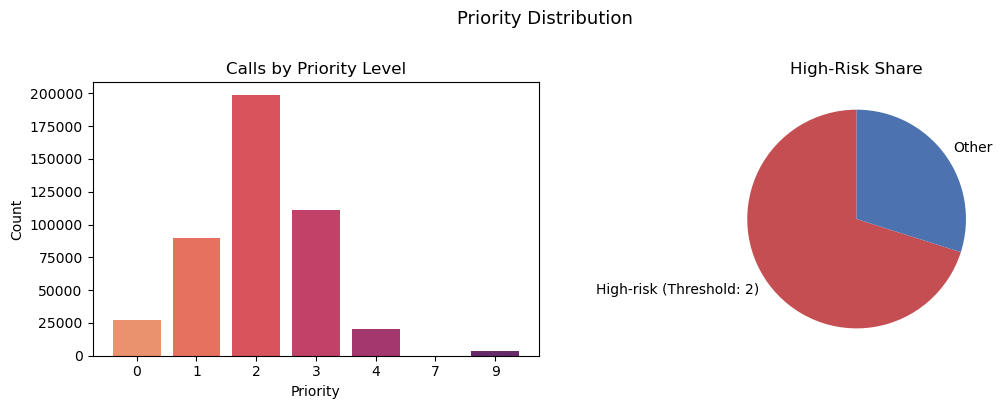

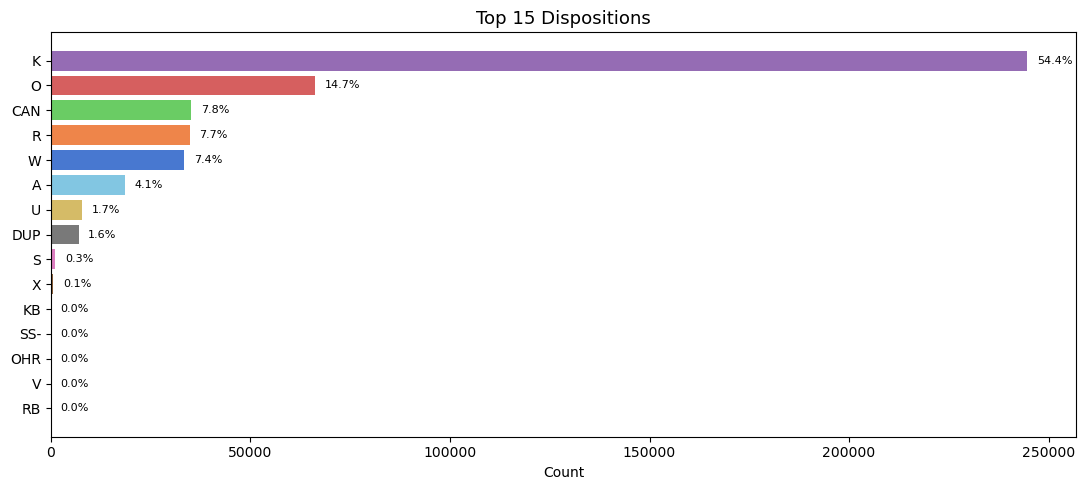

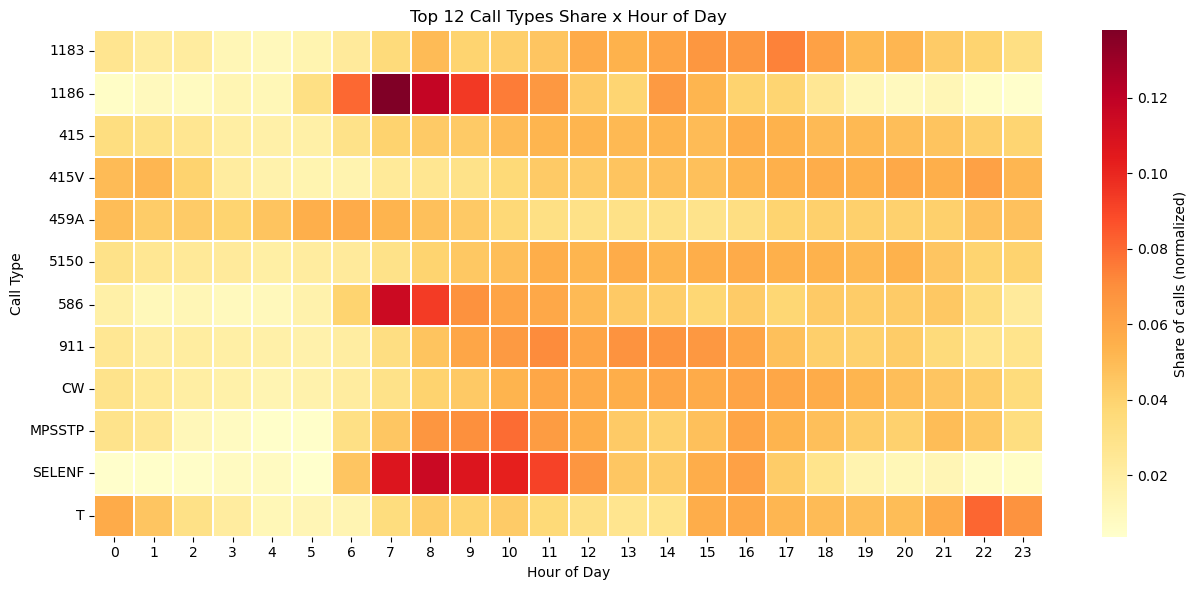

In [5]:
import modules.eda_upd as edaupd

edaupd.plot_hour_dow_heatmap(df)
edaupd.plot_seasonal_monthly(df)
edaupd.plot_call_type_distribution(df)
edaupd.plot_beat_hotspot(df)
edaupd.plot_priority_distribution(df)
edaupd.plot_disposition(df)
edaupd.plot_calltype_hour_heatmap(df)

In [6]:
del df_raw
del df

## Part III. Forecasting (Basic Regression with Gradient Boosting*)
* regression

In [7]:
import pandas as pd
import tabulate as tb
import sys
import os
from modules.clean import clean_data

df = clean_data(
    './data/00-raw/pd_calls_for_service_2025_datasd.csv',
    columns_to_remove=['ADDRESS_DIR_INTERSECTING', 'ADDRESS_ROAD_INTERSECTING', 'ADDRESS_SFX_INTERSECTING', 'ADDRESS_DIR_PRIMARY'],
    columns_to_clean=['ADDRESS_ROAD_PRIMARY', 'CALL_TYPE', 'DISPOSITION']
)

This part requires additional packages:


In [ ]:
# Use conda/pip install xgboost scikit-learn

from modules.hsbase import check_df, build_features, split_data, train_model, predict, error_analysis

check_df(df)
df2 = build_features(df)

check passed — 449,524 rows, 10 cols
features built — 283,345 rows


In [9]:
train2, test2 = split_data(df2, test_days=14)

train: 272,045 rows up to 2025-12-17
test : 11,300 rows 2025-12-18 → 2025-12-31


In [10]:
mdl = train_model(train2, lr = 0.03, n_est = 300)

model trained


In [11]:
res = predict(mdl, test2)

In [12]:
error_analysis(res)

  MAE  : 0.507
  RMSE : 0.916

Sample predictions vs actual:
      DATE  BEAT_NUM  HOUR  CALLS  PRED_CALLS  ERROR
2025-12-18       111     9      1           2     -1
2025-12-18       111    10      1           2     -1
2025-12-18       111    11      1           2     -1
2025-12-18       111    12      1           2     -1
2025-12-18       111    13      1           2     -1
2025-12-18       111    15      1           2     -1
2025-12-18       111    18      4           1      3
2025-12-18       111    19      2           1      1
2025-12-18       111    20      2           1      1
2025-12-18       111    22      2           1      1
2025-12-18       112    16      3           1      2
2025-12-18       112    17      1           1      0
2025-12-18       112    18      1           1      0
2025-12-18       112    22      1           1      0
2025-12-18       113     7      1           1      0
2025-12-18       113     9      1           1      0
2025-12-18       113    10      1     

In [13]:
del df2
del df
del mdl
del train2, test2